In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from math import e, pi
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit import transpile, assemble, Aer
from qiskit.visualization.bloch import Bloch
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_histogram

C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


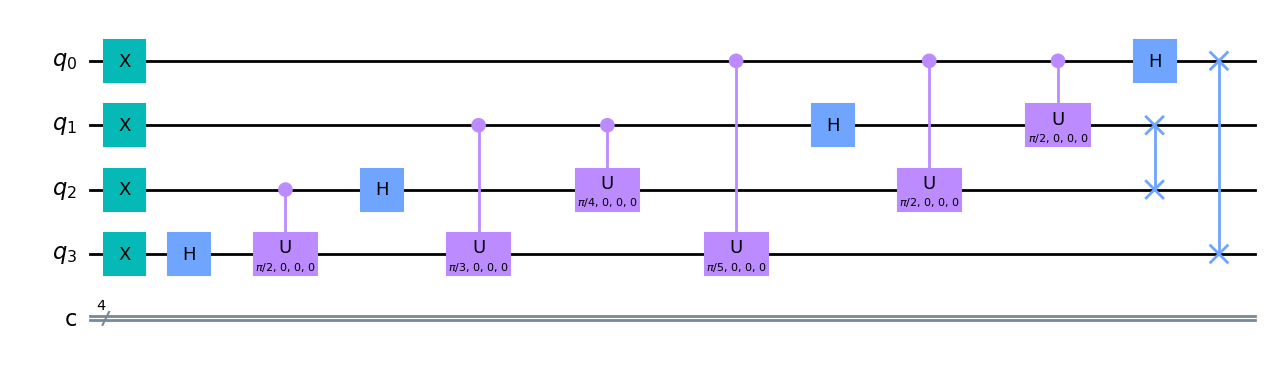

In [6]:
qc= QuantumCircuit(4,4)
qc.x(range(4))
qc.h(3)
qc.cu(np.pi/2,0,0,0,2,3)
qc.h(2)
qc.cu(np.pi/3,0,0,0,1,3)
qc.cu(np.pi/4,0,0,0,1,2)
qc.cu(np.pi/5,0,0,0,0,3)
qc.h(1)
qc.cu(np.pi/2,0,0,0,0,2)
qc.cu(np.pi/2,0,0,0,0,1)
qc.h(0)
qc.swap(1,2)
qc.swap(0,3)
qc.draw('mpl')

In [1]:
state = Statevector(qc)
plot_bloch_multivector(state)

NameError: name 'Statevector' is not defined

# Color space QFT

In [23]:
n = 200
k = 100

x = np.sin(n*np.pi/510) * np.cos(k * np.pi / (3 *n))
y = np.sin(n*np.pi/510) * np.sin(k * np.pi / (3 *n))
z = np.cos(n*np.pi/510)
phi = round(np.arctan2(y,x),4) / 2
theta = round(np.arccos(z),4) / 2
Q = np.array([x,y,z])

C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


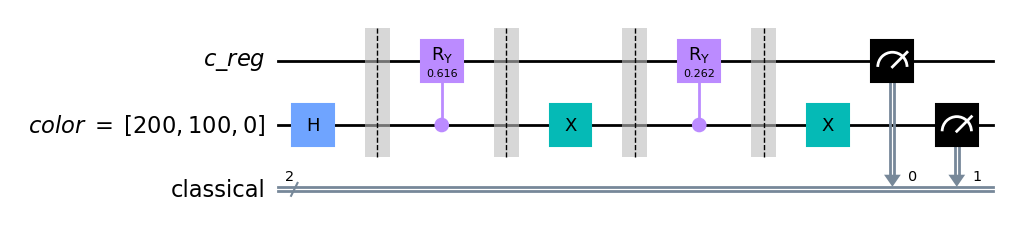

In [24]:
c_reg = QuantumRegister(1,name='c_reg')
color = QuantumRegister(1, name='color = [200,100,0]')
classic = ClassicalRegister(2, name = 'classical')
qc = QuantumCircuit(c_reg,color, classic)
qc.h(1)
qc.barrier()
qc.cry(theta,color,c_reg)
qc.barrier()
qc.x(1)
qc.barrier()
qc.cry(phi,color,c_reg)
qc.barrier()
qc.x(1)
qc.measure([0,1],[0,1])
qc.draw('mpl')

In [25]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=200000)
job = aer_sim.run(qobj)
result = job.result()
counts = result.get_counts()

C:\Users\HCI\AppData\Local\Temp\ipykernel_2016\463278846.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = aer_sim.run(qobj)


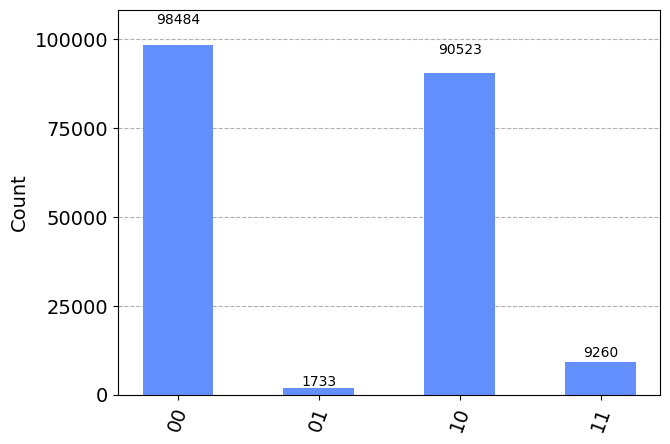

In [26]:
plot_histogram(counts)

In [27]:
print(theta, phi)

0.616 0.2618


In [35]:
phi_recon = np.arccos(np.sqrt(98484/(98484+1733))) * 2
theta_recon = np.arccos(np.sqrt(90523/(90523+9260))) * 2
print(theta_recon, phi_recon)

0.6191065768858691 0.26376566512924193


In [36]:
print(x,y,z)

0.8167956999440719 0.4715772172356387 0.3323547994796596


C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


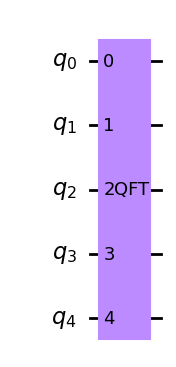

In [3]:
from qiskit.circuit.library import QFT

qft = QFT(5)
qft.draw('mpl')